In [33]:
!pip install sunpy[all]

In [340]:
import os
from astropy.io import fits
import sunpy.map
#from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator
from skimage.transform import resize

In [134]:
folder_path = "/home/anu/Desktop/samapti/carrington"
save_dir1="/home/anu/Desktop/samapti/carrington/South hemisphere"
save_dir2= "/home/anu/Desktop/samapti/carrington/North hemisphere"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))
print(fits_files)

['/home/anu/Desktop/samapti/carrington/synop_Mr_0.1960.fits']


In [326]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data
    #print(header)
    #print(data)

In [246]:
print(360/3600)

0.1


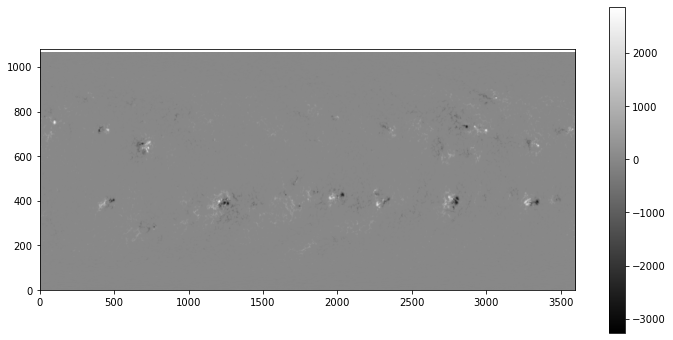

In [136]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray', aspect=1.5)              #vmax=100, vmin=-100
plt.colorbar()

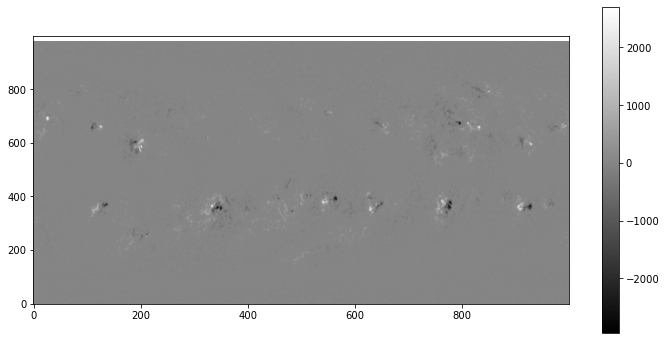

In [345]:
newdata=resize(data, (1000,1000), mode="reflect", anti_aliasing=True)
fig = plt.figure(figsize=(12,6))
plt.imshow(newdata, origin="lower", cmap='gray', aspect=0.5)              #vmax=100, vmin=-100
plt.colorbar()

In [347]:
nx=newdata.shape[1]
ny=newdata.shape[0]
print(nx)

1000


In [349]:
longitude=[]
longitude_rad=[]
sinlat=[]
latitude=[]

R_sun = 6.96e10
d_sinlat=2/ny
dtr=np.pi/180
rtd=180/np.pi
dlon_rad=(360/nx)*dtr



for i in range (ny):
  sin_lat= -1+i*(2/ny)
  Latitude =np.arcsin(sin_lat)*rtd
  Latitude_rad=  (Latitude*dtr)
  
  latitude.append(Latitude)
  sinlat.append(sin_lat)
for j in range(nx):
    Longitude = 0+j*(360/nx)
    Longitude_rad=Longitude*dtr
    d_lon=360/nx
    dlon_rad=d_lon*dtr
    longitude.append(Longitude)
    longitude_rad.append(Longitude_rad)
  
Flux=(data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
print(Flux)


6.087350987525413e+16
[[-5.4786163e+17 -5.2959960e+17 -4.9916282e+17 ...  5.4907912e+18
   5.3020831e+18  5.1133756e+18]
 [-2.0392627e+18 -2.1001363e+18 -2.1488351e+18 ... -5.5394904e+17
  -5.9656051e+17 -6.3917195e+17]
 [ 1.2418196e+18  1.4122656e+18  1.5583620e+18 ...  2.8367059e+18
   2.8427931e+18  2.8123564e+18]
 ...
 [           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan            nan ...            nan
             nan            nan]]


In [351]:
nx=data.shape[1]
ny=data.shape[0]
print(nx)


3600


In [352]:
longitude=[]
longitude_rad=[]
sinlat=[]
latitude=[]
coslat=[]
R_sun = 6.96e10
d_sinlat=2/ny
dtr=np.pi/180
rtd=180/np.pi
dlon_rad=(360/nx)*dtr



for i in range (ny):
  sin_lat= -1+i*(2/ny)
  Latitude =np.arcsin(sin_lat)*rtd
  Latitude_rad=  (Latitude*dtr)
  cos_lat=np.cos(Latitude_rad)
  coslat.append(cos_lat)
  latitude.append(Latitude)
  sinlat.append(sin_lat)
for j in range(nx):
    Longitude = 0+j*(360/nx)
    Longitude_rad=Longitude*dtr
    d_lon=360/nx
    dlon_rad=d_lon*dtr
    longitude.append(Longitude)
    longitude_rad.append(Longitude_rad)
  
Flux=(data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
#print( longitude_rad[1:6])
#print(coslat)
#plt.plot( latitude,coslat)
#fig = plt.figure()
#plt.plot( latitude, sinlat)

1.56567669432238e+16


In [92]:
print(np.subtract(longitude_rad[2:7], longitude_rad[1:6]))

[0.00174581 0.00174581 0.00174581 0.00174581 0.00174581]


In [248]:

print(100*S)

1.56567669432238e+18


/tmp/ipykernel_3352/1083888568.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Flux, cmap='gray')


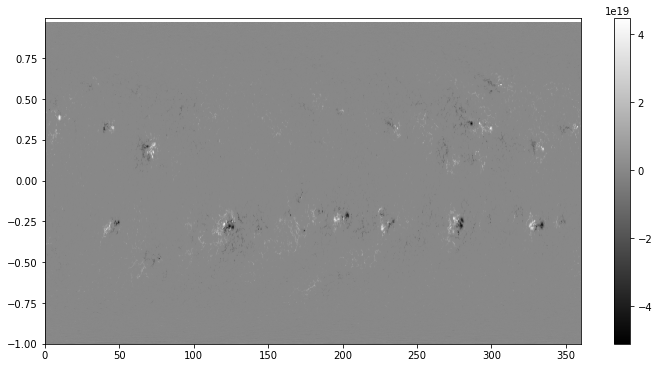

In [337]:
lon=np.array(longitude)
Sinlat=np.array( sinlat)
X,Y=np.meshgrid(lon, Sinlat )
fig = plt.figure(figsize=(12,6))
plt.pcolormesh(X,Y,Flux, cmap='gray')
plt.colorbar()

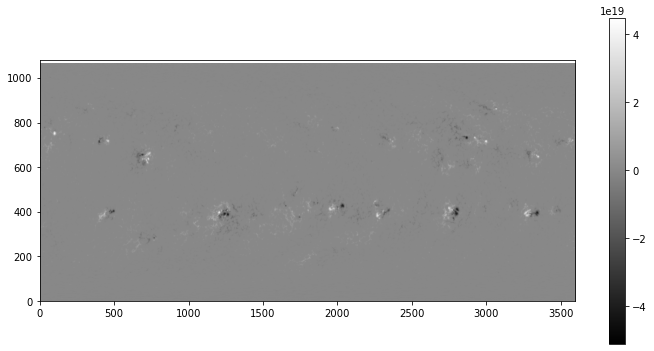

In [249]:
fig = plt.figure(figsize=(12,6))



plt.imshow(Flux,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()






In [331]:
lon=np.linspace(min(longitude), max(longitude),1000)

lat= np.linspace(min(latitude), max(latitude),1000)

x,y=np.meshgrid(lon, lat)
flux= RegularGridInterpolator((latitude,longitude),Flux)((y,x))
Sinlat=np.linspace(min(sinlat), max(sinlat),1000)

X,Y=np.meshgrid(lon, Sinlat )
flux1= RegularGridInterpolator((sinlat,longitude),Flux)((Y,X))
#print(lat)
#print(Sinlat)
#print(lon.shape)
#print(flux)
print(flux1)


[[-1.40910911e+17 -1.12387060e+17 -6.91295575e+16 ...  1.45013326e+18
   1.34501817e+18  1.31516846e+18]
 [-4.56922122e+17 -4.85994615e+17 -4.94977848e+17 ... -1.67673932e+17
  -2.54202838e+17 -9.33058708e+16]
 [ 2.76769023e+17  3.74843086e+17  4.27237757e+17 ...  3.73512606e+17
   4.82141722e+17  6.23791316e+17]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]


In [94]:
#print(lon)

/tmp/ipykernel_3352/3491209664.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,flux, cmap='gray')
/tmp/ipykernel_3352/3491209664.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,flux1, cmap='gray')     #, vmin=-1e19,vmax=1e19)


Text(0, 0.5, 'sin(lat)')

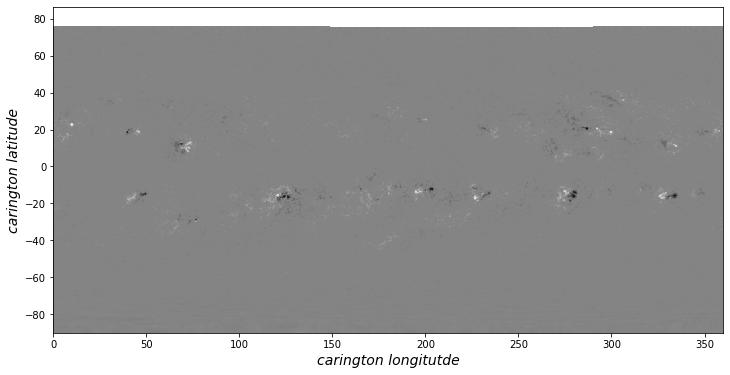

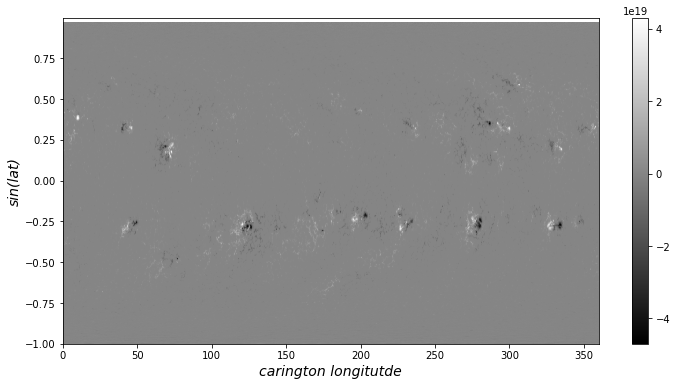

In [317]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y,flux, cmap='gray')
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("carington latitude", color="black", fontsize=14, fontstyle="oblique")
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(X,Y,flux1, cmap='gray')     #, vmin=-1e19,vmax=1e19)
plt.colorbar()
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("sin(lat)", color="black", fontsize=14, fontstyle="oblique")

In [332]:
lon=np.linspace(min(longitude), max(longitude),1000)

lat= np.linspace(min(latitude), max(latitude),1000)

x,y=np.meshgrid(lon, lat)
#flux= RegularGridInterpolator((latitude,longitude),Flux)((y,x))
Sinlat=np.linspace(min(sinlat), max(sinlat),1000)

X,Y=np.meshgrid(lon, Sinlat )
Data= RegularGridInterpolator((sinlat,longitude),data)((Y,X))

Nx=Data.shape[1]
Ny=Data.shape[0]
d_sinlat=2/Ny
dlon_rad=(360/Nx)*dtr
#Flux1=(Data1)*(R_sun**2)*(d_sinlat)*(dlon_rad)
Flux=(Data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
print(Flux)
#print(Flux1)

6.087350987525413e+16
[[-5.47861589e+17 -4.36960901e+17 -2.68775736e+17 ...  5.63811794e+18
   5.22943067e+18  5.11337483e+18]
 [-1.77651326e+18 -1.88954700e+18 -1.92447390e+18 ... -6.51916306e+17
  -9.88340668e+17 -3.62773211e+17]
 [ 1.07607789e+18  1.45738997e+18  1.66110039e+18 ...  1.45221695e+18
   1.87456697e+18  2.42530060e+18]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]


In [ ]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y,Data, cmap='gray')
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("carington latitude", color="black", fontsize=14, fontstyle="oblique")
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(X,Y,Data1, cmap='gray')     #, vmin=-1e19,vmax=1e19)
plt.colorbar()
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("sin(lat)", color="black", fontsize=14, fontstyle="oblique")

In [252]:
fluxthres1=1.5e18
fluxthres2= -1.5e18
print(fluxthres2)
binary_mask=(flux>fluxthres1)|(flux<fluxthres2)
labeled_array, num_features = label(binary_mask)
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))
sizes1 = ndimage.sum(binary_mask, labeled_array)
areathres=50
mask_filtered = np.zeros_like(binary_mask)

print(sizes1)


-1.5e+18
27542


In [253]:
for i, size in enumerate(sizes):
    #print(f"{i+1}  {size}")
    
    if size >=areathres:
       mask_filtered[labeled_array == (i + 1)] = 1


/tmp/ipykernel_3352/812874150.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, binary_mask, cmap='gray')


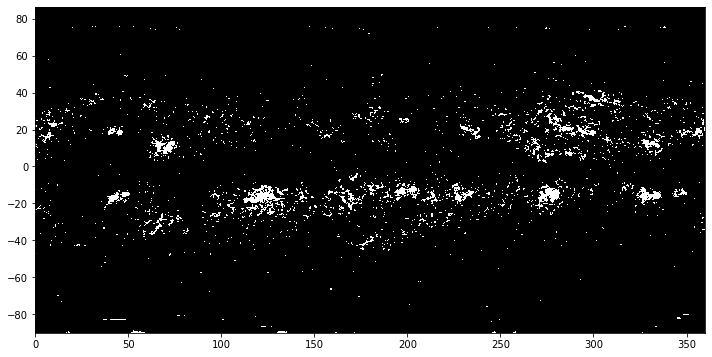

In [254]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, binary_mask, cmap='gray')



In [255]:
totflux=ndimage.sum(flux, labeled_array, range(1, num_features + 1))
#totflux1=ndimage.sum(flux, labeled_array)
#print(totflux1)
Totflux= np.zeros_like(flux)
#print(Totflux)
for i, val in enumerate(totflux):
    Totflux[labeled_array == (i + 1)] = val
#print(totflux1)



/tmp/ipykernel_3352/3909787639.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, Totflux, cmap='gray')


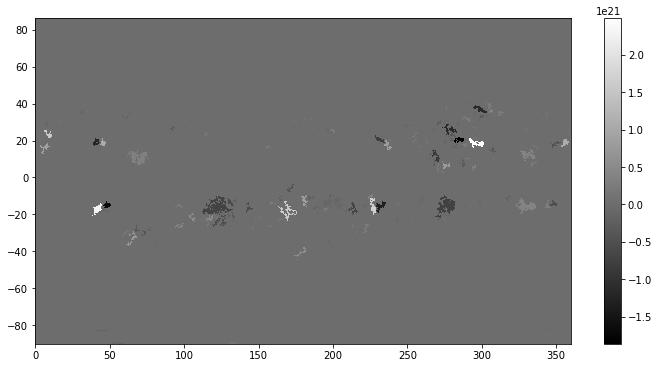

In [256]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, Totflux, cmap='gray')
plt.colorbar()

In [257]:
regionthres1 = 2e20
regionthres2 = -2e20
binary_mask2=(Totflux>regionthres1)| (Totflux<regionthres2)
#print(binary_mask2.shape)
#print(x.shape)


/tmp/ipykernel_3352/2989830348.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, binary_mask2, cmap='gray')


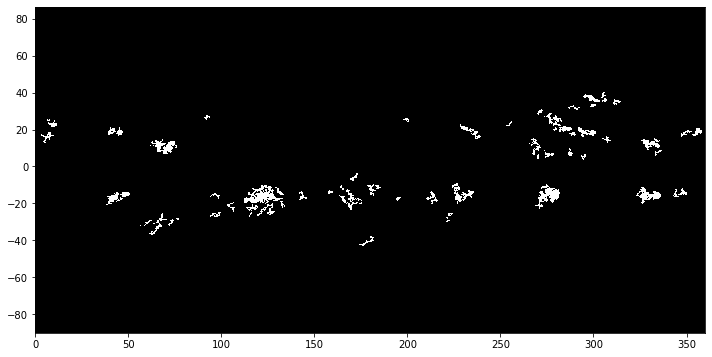

In [258]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, binary_mask2, cmap='gray')

In [259]:
y_indices, x_indices = np.where(binary_mask2==1)

Lat=lat[y_indices]
Lon=lon[x_indices]
mask1=(Lat<=0)& (Lat>=-90)
SH_lat=Lat[mask1]
SH_lon=Lon[mask1]
mask2= (Lat<=90) & (Lat>=0)
NH_lat = Lat[mask2]
NH_lon = Lon[mask2]

sorted_indices1= np.argsort(SH_lon)

SHlon_sorted=SH_lon[sorted_indices1]
SHlat_sorted=SH_lat[sorted_indices1]
output1=np.column_stack((SHlon_sorted,SHlat_sorted))
#print(SH_lon)
#print(sorted_indices1)
#print(output1)
sorted_indices2 = np.argsort(NH_lon)
NHlon_sorted= NH_lon[sorted_indices2]
NHlat_sorted = NH_lat[sorted_indices2]
output2 = np.column_stack((NHlon_sorted, NHlat_sorted))
#print(output2)

In [260]:
base_name = os.path.basename(file).replace('.fits', '')
txt_name1= f" {base_name}_SH.txt"
txt1= os.path.join(save_dir1, txt_name1)
txt_name2= f" {base_name}_NH.txt"
txt2= os.path.join(save_dir2, txt_name2)
np.savetxt(txt1,output1)
np.savetxt(txt2, output2)

In [262]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
NFiles = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
A=[]
B=[]

for NFile in txt_files:
	print(NFile)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt


In [264]:
with open (NFile, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      Nfhi=float(parts[0])
      Nfhi_rad= Nfhi*dtr
      Nlamda=float(parts[1])
    
      A.append(Nfhi)
      B.append(Nlamda)
     

In [162]:
print(N.shape)

(2111,)


In [265]:
N=np.array(A)

In [290]:
def Nmodel(lon,a,b,c):
  S = (lon*np.pi)/180
  return a+b*np.sin(S+c)                          
params, cov = curve_fit(Nmodel,N,B,method = 'trf')                                               #method = 'trf'
print(f"a = {params[0]}, b = {params[1]}, c= {params[2]}")
print(params)
Y1=Nmodel(N, *params)
#print(Y1)plt.close(fig)
b=np.subtract(B,Y1)
#print(b)
Nmean=np.mean(b**2)
#print(Nmean)
Nrms=np.sqrt(Nmean)
#print(Nrms)
error1=Nmodel(lon, *params)+Nrms
error2=Nmodel(lon, *params)-Nrms

a = 16.231463102430293, b = 4.194931452873803, c= 2.735475614351233
[16.2314631   4.19493145  2.73547561]


/tmp/ipykernel_3352/2716316521.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,binary_mask2,cmap='gray')


Text(0, 0.5, ' latitude')

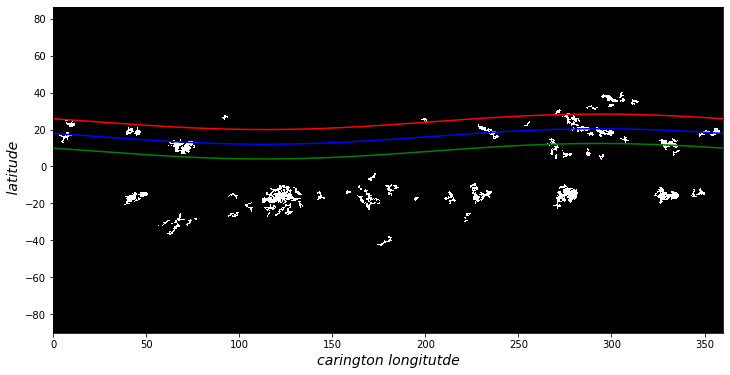

In [292]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Nmodel(lon, *params), color="blue", linewidth=1.5)
plt.pcolormesh(x,y,binary_mask2,cmap='gray')
plt.plot(lon,error1, color="red",linewidth=1.5)
plt.plot(lon,error2, color="green",linewidth=1.5)
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")





In [271]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
SFiles = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
P=[]
Q=[]

for Sfile in txt_files:
    print(Sfile)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt


In [272]:
with open (Sfile, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      Sfhi=float(parts[0])
      Slamda=float(parts[1])
      
      P.append(Sfhi)
      Q.append(Slamda)

In [273]:
M=np.array(P)

In [293]:
def Smodel(lon,p,q,r):
  S= (lon*np.pi)/180
  return p+q*np.sin(S+r)
Params, Cov = curve_fit(Smodel,M,Q,method = 'trf')
print(f"p = {Params[0]}, q = {Params[1]}, r={Params[2]}")
SY=Smodel(M, *Params)
#print(SY)
SQ=np.subtract(Q,SY)
#print(SQ)
Smean=np.mean(SQ**2)
#print(Smean)
Srms=np.sqrt(Smean)
#print(Srms)
Error1=Smodel(lon, *Params)+Srms
Error2=Smodel(lon, *Params)-Srms


p = -17.757518010203423, q = 2.5284330285545344, r=3.3833753478209503


/tmp/ipykernel_3352/184673383.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,binary_mask2,cmap='gray')


Text(0, 0.5, ' latitude')

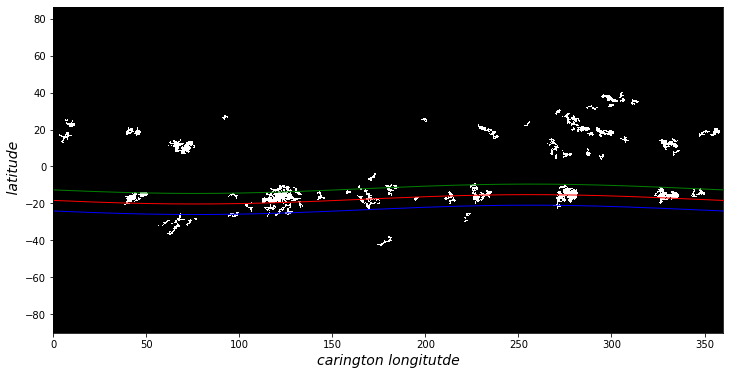

In [294]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Smodel(lon, *Params), color="Red" ,linewidth=1)
plt.plot(lon,Error1, color="green",linewidth=1)
plt.plot(lon,Error2, color="blue",linewidth=1)
plt.pcolormesh(x,y,binary_mask2,cmap='gray')

plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")

/tmp/ipykernel_3352/3074016114.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,flux,cmap='gray')


Text(0, 0.5, 'latitude')

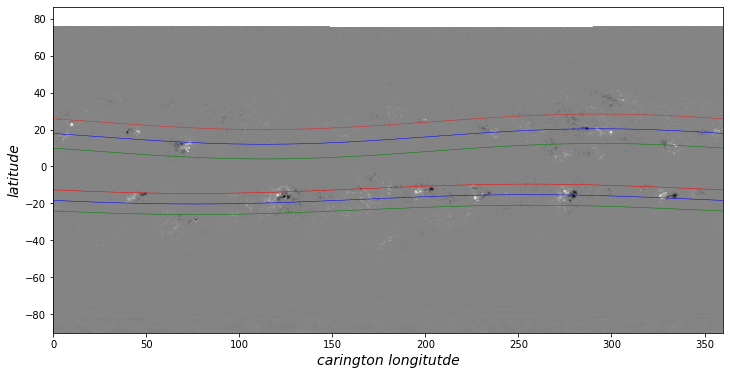

In [295]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Smodel(lon, *Params), color="blue" ,linewidth=0.5)
plt.plot(lon,Error1, color="red",linewidth=0.5)
plt.plot(lon,Error2, color="green",linewidth=0.5)

plt.plot (lon,Nmodel(lon, *params), color="blue", linewidth=0.5)
plt.plot(lon,error1, color="red",linewidth=0.5, linestyle="--")
plt.plot(lon,error2, color="green",linewidth=0.5)


plt.pcolormesh(x,y,flux,cmap='gray')
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("latitude", color="black", fontsize=14, fontstyle="oblique")

In [279]:
def Nmodel2(lon,a2,b2,c2,d2,e2):
  S = (lon*np.pi)/180
  return a2+b2*np.sin(S+c2)+ d2*np.sin(2*S+e2)                         
params2, cov2 = curve_fit(Nmodel2,N,B,method = 'trf')                                               #method = 'trf'
print(f"a2 = {params2[0]}, b2 = {params2[1]}, c2= {params2[2]},d2= {params2[3]},e2= {params2[4]}")
#perr = np.sqrt(np.diag(cov))
#print(perr)
print(params2)

a2 = 18.79720672798003, b2 = 2.970879907058241, c2= 4.094328044260015,d2= -3.323692148723632,e2= -0.46390239422663604
[18.79720673  2.97087991  4.09432804 -3.32369215 -0.46390239]


In [280]:
NY2=Nmodel2(N, *params2)
#print(Y1)
b2=np.subtract(B,NY2)
#print(b)
Nmean2=np.mean(b2**2)
print(Nmean2)
Nrms2=np.sqrt(Nmean2)
print(Nrms2)

62.26552482771218
7.8908507036765165


In [281]:
error3=Nmodel2(lon, *params2)+Nrms2
error4=Nmodel2(lon, *params2)-Nrms2

/tmp/ipykernel_3352/205778693.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray', vmin=-1e19, vmax=1e19)


Text(0, 0.5, 'carington latitude')

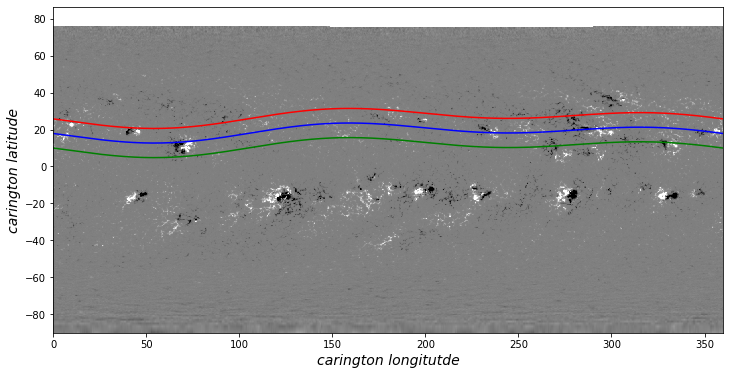

In [282]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Nmodel2(lon, *params2), color="blue", linewidth=1.5)
#plt.plot (lon,model(lon, *error1), linewidth=1)
#plt.plot (lon,model(lon, *error2), linewidth=1)

plt.pcolormesh(x,y, flux, cmap='gray', vmin=-1e19, vmax=1e19)



plt.plot(lon,error3, color="red",linewidth=1.5)

plt.plot(lon,error4, color="green",linewidth=1.5)
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("carington latitude", color="black", fontsize=14, fontstyle="oblique")


In [283]:
def Smodel2(lon,p2,q2,r2,s2,t2):
  S= (lon*np.pi)/180
  return p2+q2*np.sin(S+r2)+s2*np.sin(2*S+t2)
Params2, Cov2 = curve_fit(Smodel2,M,Q,method = 'trf')
print(f"p2 = {Params2[0]}, q2 = {Params2[1]}, r2={Params2[2]},s2={Params2[3]},t2={Params2[4]}")
#Perr = np.sqrt(np.diag(Cov))

p2 = -17.98985293224528, q2 = 2.909923273240155, r2=3.2537355315544145,s2=2.3553165427315084,t2=2.7466708138084543


In [284]:
SY2=Smodel2(M, *Params2)
print(SY2)
SQ2=np.subtract(Q,SY2)
print(SQ2)
Smean2=np.mean(SQ2**2)
print(Smean2)
Srms2=np.sqrt(Smean2)
print(Srms2)

[-21.93291026 -21.93291026 -21.93291026 ... -16.19254801 -16.19254801
 -16.19254801]
[1.01840342 1.3717819  1.19509266 ... 1.28547536 1.99223232 1.81554308]
29.92869811637065
5.470712761274408


In [285]:
Error3=Smodel2(lon, *Params2)+Srms2
Error4=Smodel2(lon, *Params2)-Srms2

/tmp/ipykernel_3352/1191642248.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray' , vmin= -1e19, vmax=1e19)


Text(0, 0.5, 'carington latitude')

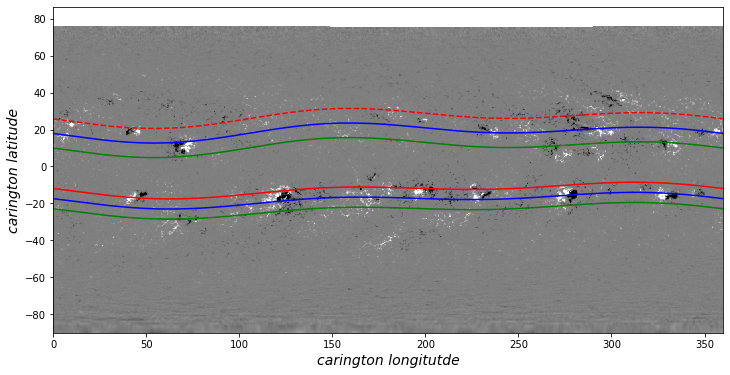

In [286]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Smodel2(lon, *Params2), color="blue" ,linewidth=1.5)
plt.plot(lon,Error3, color="red",linewidth=1.5)
plt.plot(lon,Error4, color="green",linewidth=1.5)
#plt.plot (lon,model(lon, *Error1) ,color="g",linewidth=0.5)
#plt.plot (lon,model(lon, *Error2) ,linewidth=0.5)

plt.plot (lon,Nmodel2(lon, *params2), color="blue", linewidth=1.5)
plt.plot(lon,error3, color="red",linewidth=1.5, linestyle="--")
plt.plot(lon,error4, color="green",linewidth=1.5)
#plt.plot (lon,model(lon, *error1), color="g", linewidth=0.5)
#plt.plot (lon,model(lon, *error2), linewidth=0.5)

plt.pcolormesh(x,y, flux, cmap='gray' , vmin= -1e19, vmax=1e19)
plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
plt.ylabel("carington latitude", color="black", fontsize=14, fontstyle="oblique")